<a href="https://colab.research.google.com/github/jabedomorbappi/1st-deep-learning/blob/master/Cat_vs_dog_by_using_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load all libraries**

In [ ]:
import os  
import cv2  
import random  
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt 
import zipfile 


from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report  
from tqdm import tqdm  
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline 





import torch
import glob
import glob as gb
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib




sns.set(style='whitegrid')
    

import keras
%matplotlib inline




import tensorflow as tf
import h5py
import math













from sklearn.metrics import classification_report  
from tqdm import tqdm  
from random import shuffle 
from IPython.display import SVG



import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,Dropout
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-04-16 15:19:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.23.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  89.3MB/s    in 0.7s    

2021-04-16 15:19:44 (89.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



# create a data function for all directory

In [ ]:
def data():
  import os 
  import zipfile
  local_zip = '/tmp/cats_and_dogs_filtered.zip'


  zip_ref = zipfile.ZipFile(local_zip, 'r')

  zip_ref.extractall('/tmp')
  zip_ref.close()


  base_dir = '/tmp/cats_and_dogs_filtered'

  train_dir = os.path.join(base_dir, 'train')
  validation_dir = os.path.join(base_dir, 'validation')

  # Directory with our training cat/dog pictures
  train_cats_dir = os.path.join(train_dir, 'cats')
  train_dogs_dir = os.path.join(train_dir, 'dogs')

  # Directory with our validation cat/dog pictures
  validation_cats_dir = os.path.join(validation_dir, 'cats')
  validation_dogs_dir = os.path.join(validation_dir, 'dogs')
  return train_dir,validation_dir,train_cats_dir,train_dogs_dir,validation_cats_dir,validation_dogs_dir

In [ ]:
train_dir,validation_dir,train_cats_dir,train_dogs_dir,validation_cats_dir,validation_dogs_dir=data()

# **Number of image train and validation**

In [ ]:
def image_no(train=False,test=False):
  if train==True:
    for folder in os.listdir(train_dir):
      files=gb.glob(str(train_dir+'/'+folder+'/*.jpg'))
      print(f' For training data , found {len(files)} in folder {folder}\n')

  if test==True:
    for folder in os.listdir(validation_dir):
      files=gb.glob(str(validation_dir+'/'+folder+'/*.jpg'))
      print(f'for testing data , found {len(files)} in folder {folder} \n')    


In [ ]:
image_no(train=True)

 For training data , found 1000 in folder dogs

 For training data , found 1000 in folder cats



In [ ]:
image_no(test=True)

for testing data , found 500 in folder dogs 

for testing data , found 500 in folder cats 



In [ ]:
def fname(train_cat=False,validation_cat=False,train_dog=False,validation_dog=False):
  train_cat_fnames = os.listdir( train_cats_dir )
  train_dog_fnames = os.listdir( train_dogs_dir )



  validation_cat_fnames=os.listdir(validation_cats_dir)
  validation_dog_fnames=os.listdir(validation_dogs_dir)
  if train_cat==True:
    print(train_cat_fnames[:10])
  if validation_cat==True:
    print(validation_cat_fnames[:10])

  if train_dog==True:
    print(train_dog_fnames[:10])
 
  if validation_dog==True:
    print(validation_dog_fnames[:10])
  return train_cat_fnames,train_dog_fnames,validation_cat_fnames,validation_dog_fnames





In [ ]:
train_cat_fnames,train_dog_fnames,validation_cat_fnames,validation_dog_fnames=fname()

In [ ]:
def load_data():
  root=pathlib.Path(train_dir)
  classes=sorted([j.name.split('/')[-1] for j in root.iterdir() ])
  classes


  Code=[]
  for i in range(len(classes)):
    Code+={classes[i]}
    Code+=[i]
  code={Code[i]:Code[i+1] for i in range(0,len(Code),2)}

  X_train=[]
  Y_train=[]
  for folder in os.listdir(train_dir):
    files=gb.glob(str(train_dir+'/'+folder+'/*.jpg'))
    for file in files:
      image=cv2.imread(file)
      image_array=cv2.resize(image,(224,224))
      X_train.append(list(image_array))
      Y_train.append(code[folder])
  X_train=np.array(X_train)
  Y_train=np.array(Y_train)


  X_test=[]
  Y_test=[]
  for folder in os.listdir(validation_dir):
    files=gb.glob(str(validation_dir+'/'+folder+'/*.jpg'))
    for file in files:
      image=cv2.imread(file)
      image_array=cv2.resize(image,(224,224))
      X_test.append(list(image_array))
      Y_test.append(code[folder])
  X_test=np.array(X_test)
  Y_test=np.array(Y_test)
      
  return X_train,Y_train,X_test,Y_test,classes,code







In [ ]:
X_train,Y_train,X_test,Y_test,classes,code=load_data()

In [ ]:
def getcode(n):
  for x,y in code.items():

    if n==y:
      return x
    

In [ ]:
def image_size():
  train_size=[]
  for folder in os.listdir(train_dir):
    files=gb.glob(str(train_dir+'/'+folder+'/*.jpg'))
    for file in files:
      image=cv2.imread(file)
      train_size.append(image.shape)

  train_df=pd.Series(train_size).value_counts()
  val_size=[]
  for folder in os.listdir(validation_dir):
    files=gb.glob(str(validation_dir+'/'+folder+'/*.jpg'))
    for file in files:
      image=cv2.imread(file)
      val_size.append(image.shape)
  val_df=pd.Series(val_size).value_counts()

  return train_df,val_df    


In [ ]:
train_df,val_df=image_size()

In [ ]:
train_df.head()

(374, 500, 3)    226
(375, 499, 3)    222
(499, 375, 3)     20
(239, 320, 3)     20
(500, 374, 3)     19
dtype: int64

In [ ]:
val_df.head()

(374, 500, 3)    124
(375, 499, 3)    118
(499, 375, 3)     13
(333, 499, 3)      9
(239, 320, 3)      8
dtype: int64

In [ ]:
def image_show(train=False,val=False):
  plt.figure(figsize=(100,100))
  if train==True:

    for n,i in enumerate(list(np.random.randint(0,len(X_train),25))):
      plt.subplot(5,5,n+1)
      plt.imshow(X_train[i])
      plt.axis('off')
      plt.title(getcode(Y_train[i]))
  if val==True:
    for n,i in enumerate(list(np.random.randint(0,len(X_test),25))):
      plt.subplot(5,5,n+1)
      plt.imshow(X_test[i])
      plt.axis('off')
      plt.title(getcode(Y_test[i]))


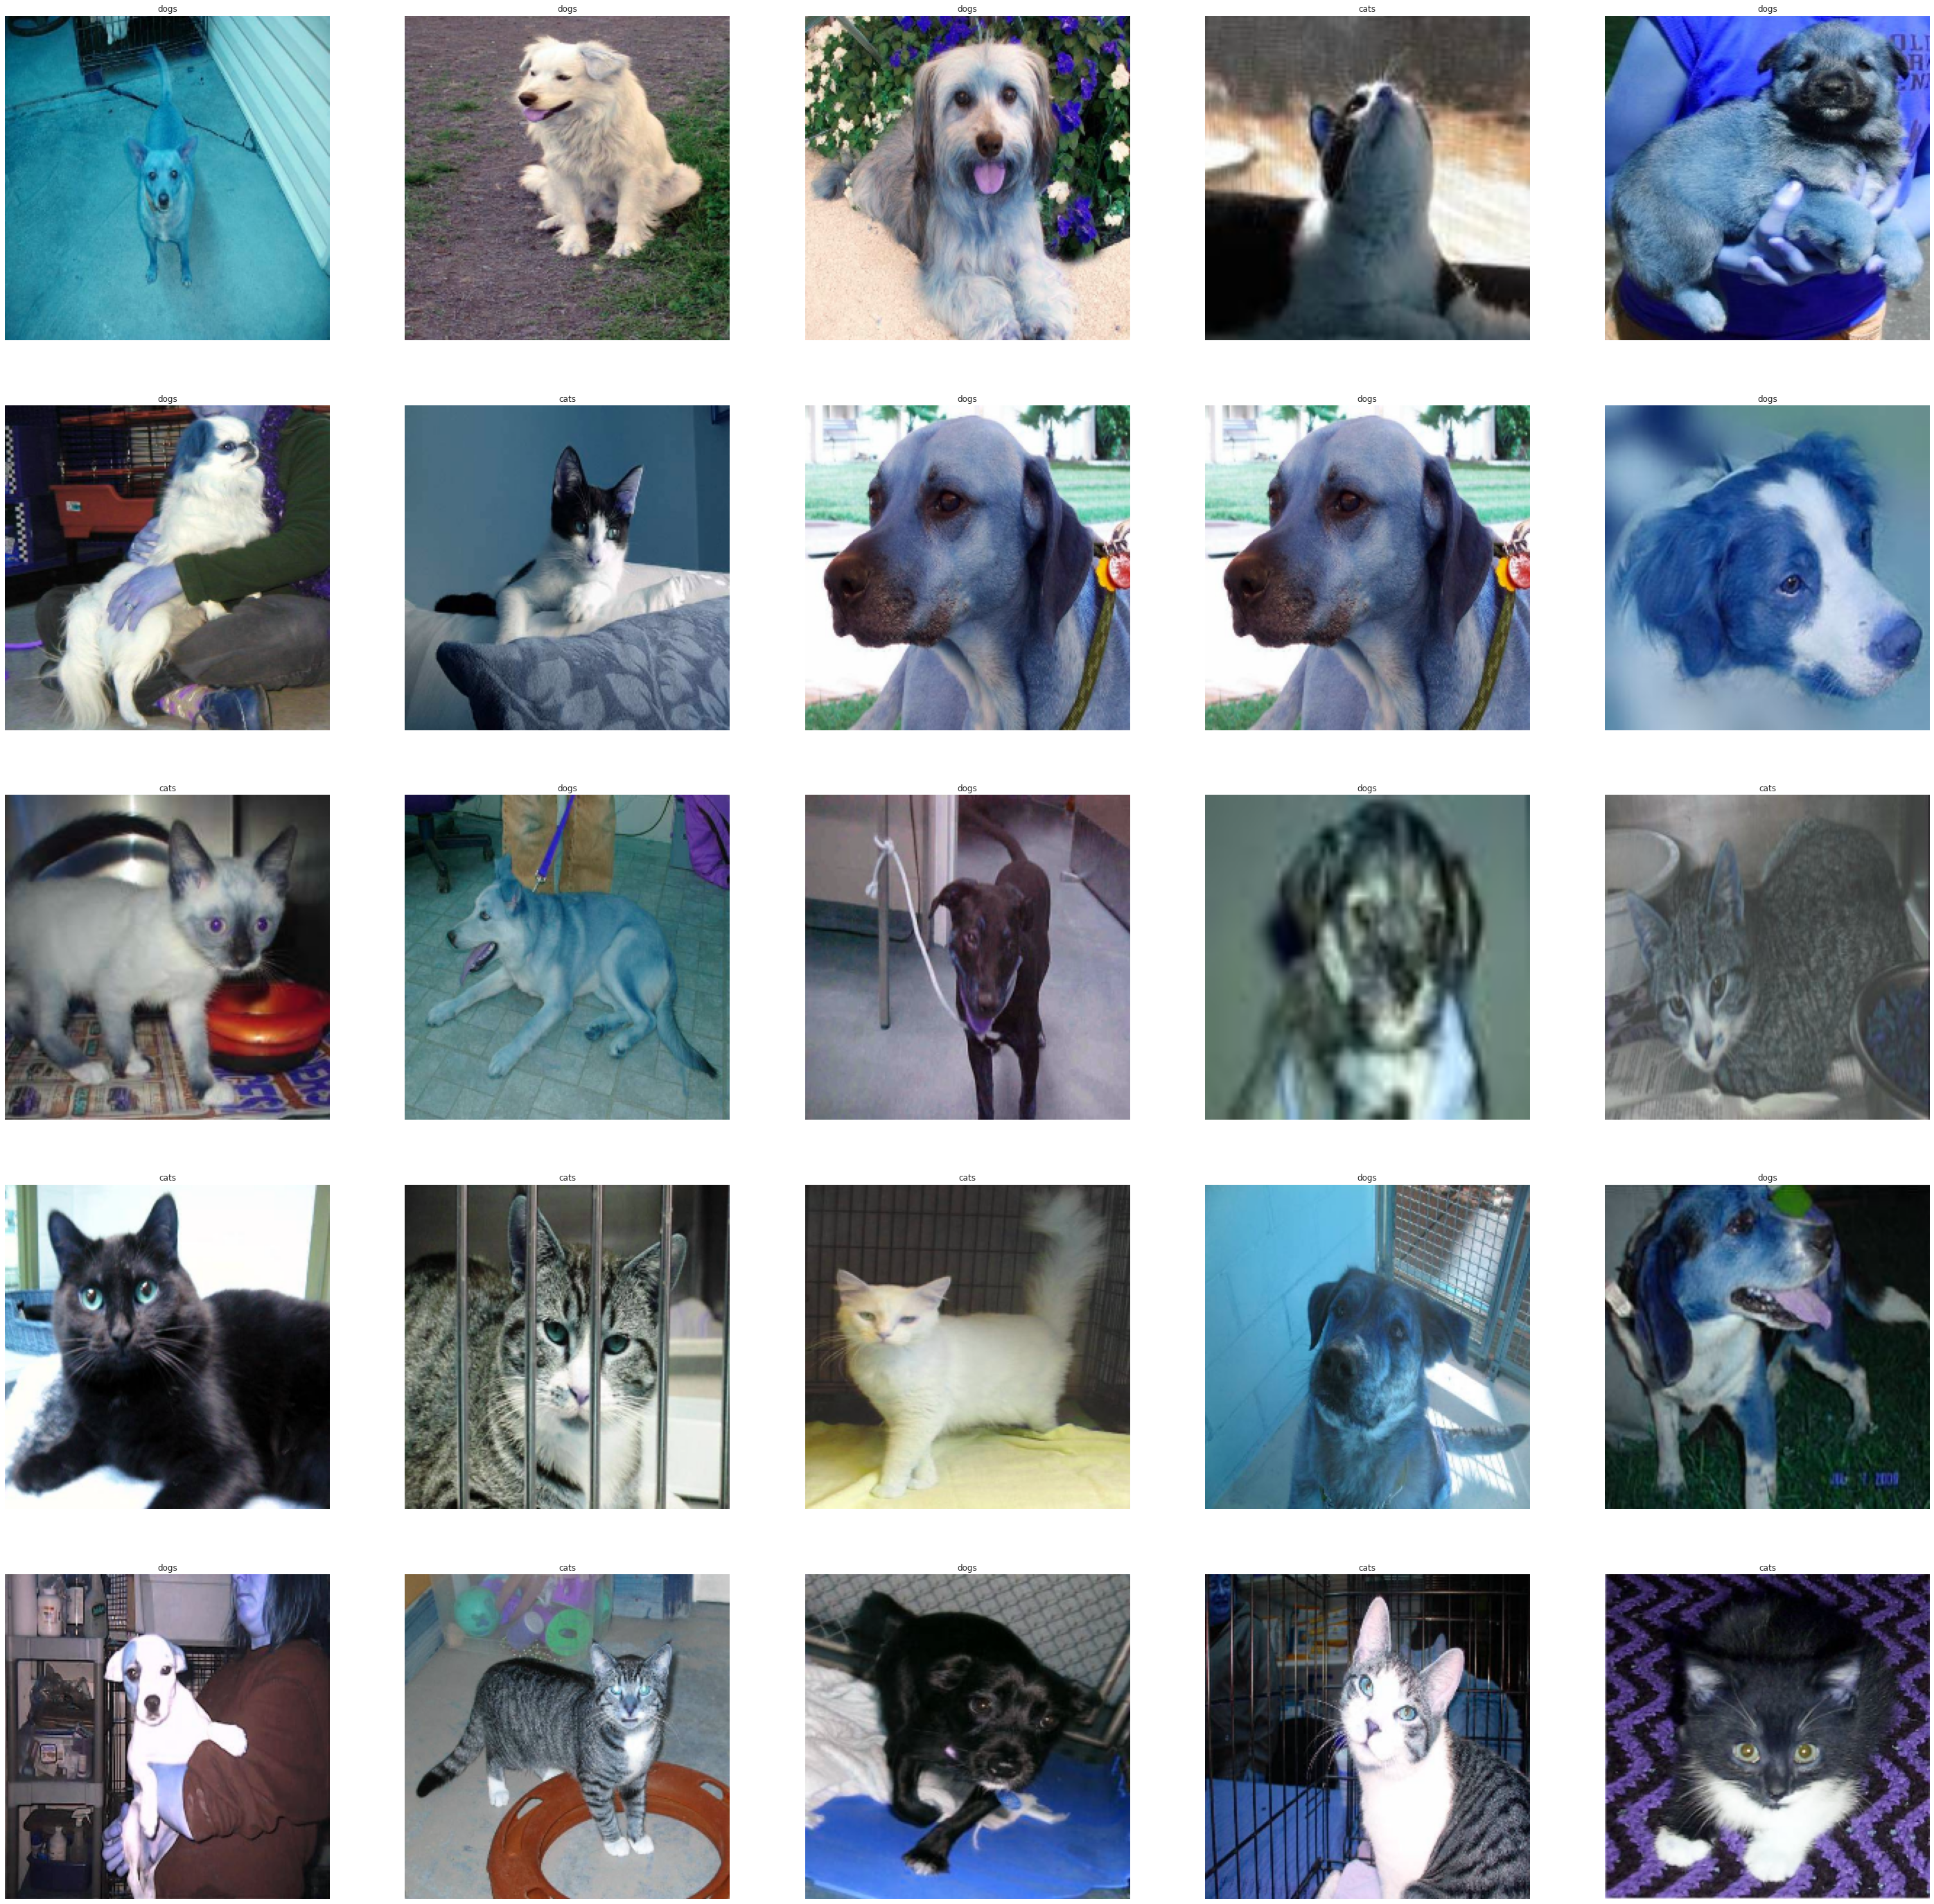

In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(list(np.random.randint(0,len(X_train),25))):

    plt.subplot(5,5,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(Y_train[i]))

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  )

plt.show()


SyntaxError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import os
import glob as gb #디렉토리내에 있는 파일들을 리스트로 리턴
import cv2        #이미지처리
import tensorflow as tf
import keras
%matplotlib inline



import os
import numpy as np
import tensorflow as tf
import h5py
import math

['cats', 'dogs']

 For training data , found 1000 in folder dogs

 For training data , found 1000 in folder cats



In [ ]:
happy_model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

happy_model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:

from tensorflow.keras.optimizers import RMSprop

happy_model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
history = happy_model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_steps=50,
                              verbose=2)

Epoch 1/5
100/100 - 52s - loss: 0.6946 - accuracy: 0.5910 - val_loss: 0.6526 - val_accuracy: 0.6490
Epoch 2/5
100/100 - 51s - loss: 0.6154 - accuracy: 0.6800 - val_loss: 0.6167 - val_accuracy: 0.6790
Epoch 3/5
100/100 - 51s - loss: 0.5254 - accuracy: 0.7450 - val_loss: 0.5688 - val_accuracy: 0.7150
Epoch 4/5
100/100 - 51s - loss: 0.4547 - accuracy: 0.7740 - val_loss: 0.6519 - val_accuracy: 0.6940
Epoch 5/5
100/100 - 51s - loss: 0.3614 - accuracy: 0.8430 - val_loss: 0.6071 - val_accuracy: 0.7250


Saving 10.jpg to 10.jpg
[1.]
10.jpg is a dog


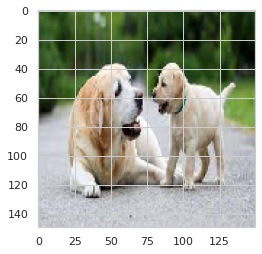

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = happy_model.predict(images, batch_size=10)
  
  print(classes[0])
  plt.imshow(img)
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


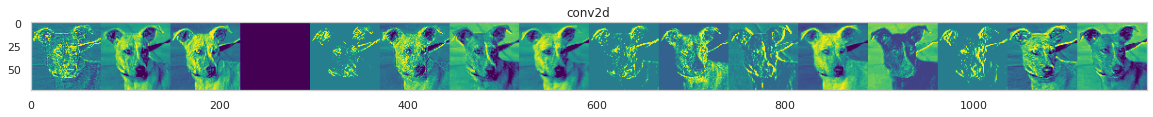

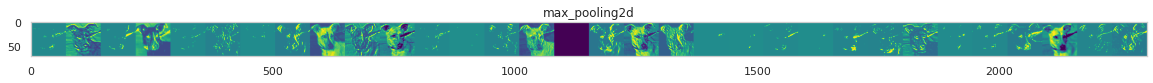

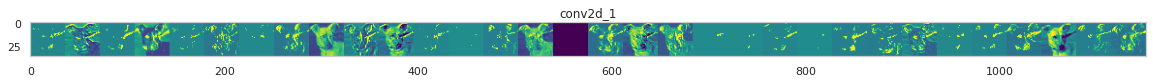

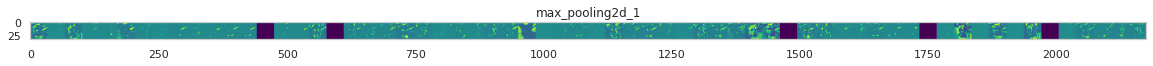

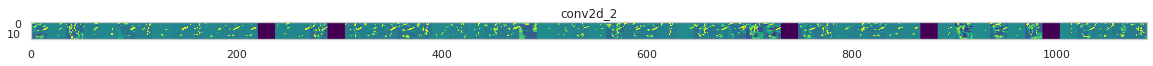

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in happy_model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = happy_model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in happy_model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

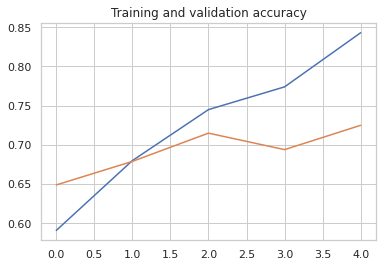

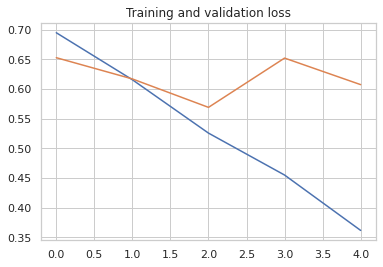

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )


# Now create another model 

In [ ]:
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model1.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
history = model1.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_steps=50,
                              verbose=2)

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
history = model1.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_steps=50,
                              verbose=2)

Epoch 1/5
100/100 - 49s - loss: 0.7147 - accuracy: 0.5005 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/5
100/100 - 48s - loss: 0.6853 - accuracy: 0.5500 - val_loss: 0.6920 - val_accuracy: 0.5860
Epoch 3/5
100/100 - 48s - loss: 0.6629 - accuracy: 0.6115 - val_loss: 0.6378 - val_accuracy: 0.6350
Epoch 4/5
100/100 - 48s - loss: 0.6231 - accuracy: 0.6430 - val_loss: 0.5930 - val_accuracy: 0.6900
Epoch 5/5
100/100 - 48s - loss: 0.5782 - accuracy: 0.6905 - val_loss: 0.5873 - val_accuracy: 0.6770


Saving 10.jpg to 10 (1).jpg
[1.]
10.jpg is a dog


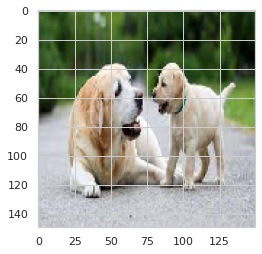

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model1.predict(images, batch_size=10)
  
  print(classes[0])
  plt.imshow(img)
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

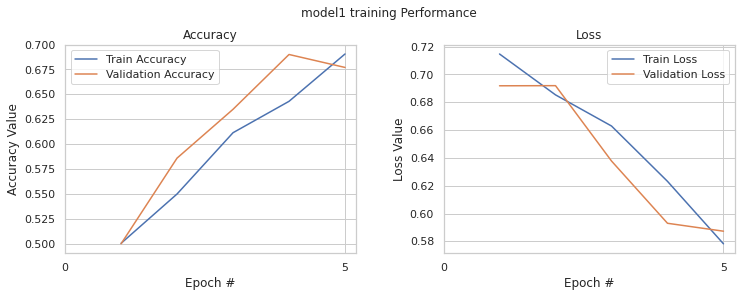

In [ ]:

EPOCHS =5

import matplotlib.pyplot as plt


figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = figure.suptitle('model1 training Performance', fontsize=12)
figure.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, EPOCHS + 1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS + 1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS + 1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

GRAPH_FILE = 'model1_Training_Performance.pdf'
figure.savefig(GRAPH_FILE)
figure.show()

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
def AlexNet(input_shape):


  X_input = Input(input_shape)

  X = ZeroPadding2D((3, 3))(X_input)

  #1st layer 


  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(96, (11,11), strides = (4, 4), name = 'conv0')(X)
  X = BatchNormalization(axis = 3, name = 'bn0')(X)
  X = Activation('relu')(X)

    # MAXPOOL1
  X = MaxPooling2D((3, 3),strides=(2,2), name='max_pool0')(X)



  #2nd layer 
  X=Conv2D(256,(5,5),strides=(1,1),name='conv1')(X)

  X = BatchNormalization(axis = 3, name = 'bn1')(X)
  X = Activation('relu')(X)

    # MAXPOOL2
  X = MaxPooling2D((3, 3),strides=(2,2), name='max_pool1')(X)


  #3rd layer 
  X=Conv2D(384,(3,3),name='conv2')(X)

  X = BatchNormalization(axis = 3, name = 'bn2')(X)
  X = Activation('relu')(X)






  #4th layer 


   
  X=Conv2D(384,(3,3),name='conv3')(X)

  X = BatchNormalization(axis = 3, name = 'bn3')(X)
  X = Activation('relu')(X)

  #5th layer 
   
  X=Conv2D(384,(3,3),name='conv4')(X)

  X = BatchNormalization(axis = 3, name = 'bn4')(X)
  X = Activation('relu')(X)

    # MAXPOOL2
  X = MaxPooling2D((3, 3),strides=(2,2), name='max_pool2')(X)



  #6th layer 

  # fully connected layer 
  X = Flatten()(X)

  X = Flatten()(X)

  X = Dense(1, activation='sigmoid', name='fc')(X)
  Alex_model = Model(inputs = X_input, outputs = X, name='AlexNet')

  return Alex_model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(227, 227))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=10,
                                                         class_mode  = 'binary',
                                                         target_size = (227, 227))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model=AlexNet((227,227,3))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=2000//32,
                              epochs=5,
                              validation_steps=1000//10,
                              verbose=2)

Epoch 1/5
62/62 - 170s - loss: 0.8909 - accuracy: 0.5549 - val_loss: 2.0101 - val_accuracy: 0.5000
Epoch 2/5
62/62 - 169s - loss: 0.7132 - accuracy: 0.5833 - val_loss: 1.2413 - val_accuracy: 0.5370
Epoch 3/5
62/62 - 168s - loss: 0.6733 - accuracy: 0.6316 - val_loss: 1.6282 - val_accuracy: 0.5250
Epoch 4/5
62/62 - 168s - loss: 0.6449 - accuracy: 0.6616 - val_loss: 1.4015 - val_accuracy: 0.5300
Epoch 5/5
62/62 - 168s - loss: 0.5942 - accuracy: 0.7114 - val_loss: 2.3227 - val_accuracy: 0.5610


Saving 10.jpg to 10 (5).jpg
[0.]
10.jpg is a cat


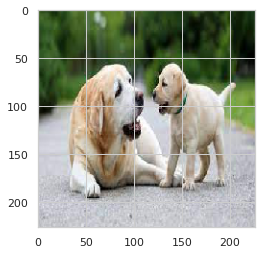

In [ ]:

import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(227, 227))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  plt.imshow(img)
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")



In [ ]:
# 将训练得到的模型保存到文件

MODEL_FILE = 'AlexNet.h5'
model.save(MODEL_FILE, overwrite=True)

# 保存训练历史数据
json_path = "AlexNet_Dogs_vs_Cat_Training_History.json"
f = open(json_path, "w")
f.write(json.dumps(str(history.history), skipkeys=True))
f.close()

ModuleNotFoundError: ignored

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
history=modelfit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

In [ ]:
def VGG16(input_shape):

  # in this model always CONVOLUTION  =3 by 3, stride=1,same
  # in this model always POOLING =2 by 2 s=2 


  # define the placeholder image shape
  X_input = Input(input_shape)
  # zero padding 
  X = ZeroPadding2D((3, 3))(X_input)

  


  #1st layer (conv64)
  

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(64, (3,3), strides = (1, 1), name = 'conv0')(X)
  X = BatchNormalization(axis = 3, name = 'bn0')(X)
  X = Activation('relu')(X)


  #2nd layer (conv64)
  

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(64, (3,3), strides = (1, 1), name = 'conv1')(X)
  X = BatchNormalization(axis = 3, name = 'bn1')(X)
  X = Activation('relu')(X)

  # MAXPOOL1
  X = MaxPooling2D((2, 2),strides=(2,2), name='max_pool0')(X)


  #3rd layer 
  #convolutional---(conv128)

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(128, (3,3), strides = (1, 1), name = 'conv2')(X)
  X = BatchNormalization(axis = 3, name = 'bn2')(X)
  X = Activation('relu')(X)

  #4th layer 
  #convolutional---(conv128)

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(128, (3,3), strides = (1, 1), name = 'conv3')(X)
  X = BatchNormalization(axis = 3, name = 'bn3')(X)
  X = Activation('relu')(X)

  #maxpooling 2
  X = MaxPooling2D((2, 2),strides=(2,2), name='max_pool1')(X)

  #5th layer 
  #convolution --256

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(256, (3,3), strides = (1, 1), name = 'conv4')(X)
  X = BatchNormalization(axis = 3, name = 'bn4')(X)
  X = Activation('relu')(X)



  #6th layer 
  #convolution --256

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(256, (3,3), strides = (1, 1), name = 'conv5')(X)
  X = BatchNormalization(axis = 3, name = 'bn5')(X)
  X = Activation('relu')(X)

  #7th layer 
  #convolution --256

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(256, (3,3), strides = (1, 1), name = 'conv6')(X)
  X = BatchNormalization(axis = 3, name = 'bn6')(X)
  X = Activation('relu')(X)


  #maxpooling
  X = MaxPooling2D((2, 2),strides=(2,2), name='max_pool2')(X)

  #8th layer
  #covolution 512

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(512, (3,3), strides = (1, 1), name = 'conv7')(X)
  X = BatchNormalization(axis = 3, name = 'bn7')(X)
  X = Activation('relu')(X)


  #9th layer
  #covolution 512

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(512, (3,3), strides = (1, 1), name = 'conv8')(X)
  X = BatchNormalization(axis = 3, name = 'bn8')(X)
  X = Activation('relu')(X)

  #10th layer
  #covolution 512

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(512, (3,3), strides = (1, 1), name = 'conv9')(X)
  X = BatchNormalization(axis = 3, name = 'bn9')(X)
  X = Activation('relu')(X)

  #maxpooling
  X = MaxPooling2D((2, 2),strides=(2,2), name='max_pool3')(X)


  #11th layer
  #covolution 512

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(512, (3,3), strides = (1, 1), name = 'conv10')(X)
  X = BatchNormalization(axis = 3, name = 'bn10')(X)
  X = Activation('relu')(X)

  #12th layer
  #covolution 512

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(512, (3,3), strides = (1, 1), name = 'conv11')(X)
  X = BatchNormalization(axis = 3, name = 'bn11')(X)
  X = Activation('relu')(X)

  #13th layer
  #covolution 512

  # CONV -> BN -> RELU Block applied to X
  X = Conv2D(512, (3,3), strides = (1, 1), name = 'conv12')(X)
  X = BatchNormalization(axis = 3, name = 'bn12')(X)
  X = Activation('relu')(X)

  #maxpooling
  X = MaxPooling2D((2, 2),strides=(2,2), name='max_pool4')(X)

  # fully connected layer 
  X = Flatten()(X)

  X = Flatten()(X)

  X = Dense(1, activation='sigmoid', name='fc')(X)
  VGG_16_model = Model(inputs = X_input, outputs = X, name='VGG_16')

  return VGG_16_model

  

In [ ]:
model=VGG16((227,227,3))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=2000//32,
                              epochs=7,
                              validation_steps=1000//10,
                              verbose=2)

Epoch 1/7
62/62 - 3116s - loss: 0.9452 - accuracy: 0.5432 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 2/7
